## Image Segmentation

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from sklearn.cluster import MeanShift

from PIL import Image
import cv2

# reduce size of original image to reduce computation time
size = 100,100

In [2]:
#run it on google colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
path="/content/drive/My Drive/Colab Notebooks"
os.chdir(path)
os.listdir(path)

['Untitled0.ipynb',
 'clever-shapes.png',
 'blueberries.png',
 'coke-bottles.png',
 'Untitled',
 'z5325417_lab3.ipynb',
 'COMP9517_21T3_Lab4_Student_Template.ipynb']

#### function for displaying images

In [4]:
def plot_two_images(figure_title, image1, label1, image2, label2):
    
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 2, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 2, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    plt.show()

In [5]:
def plot_three_images(figure_title, image1, label1, image2, label2, image3, label3):
    
    fig = plt.figure()
    fig.suptitle(figure_title)

    # Display the first image
    fig.add_subplot(1, 3, 1)
    plt.imshow(image1)
    plt.axis('off')
    plt.title(label1)

    # Display the second image
    fig.add_subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    plt.title(label2)

    # Display the third image
    fig.add_subplot(1, 3, 3)
    plt.imshow(image3)
    plt.axis('off')
    plt.title(label3)

    plt.show()

#### Function for applying meanshift algorithm

In [6]:
def apply_meanshift(img):
    
    # TODO: Apply Meanshift on image
    # Follow the following hints as per the lab specification.

    # Step 1 - Extract the three RGB colour channels
    #Select all by default
    img = np.array(img)[:, :, :3]
    blue_img = img[:,:,0]
    green_img = img[:,:,1]
    red_img = img[:,:,2]

    
    
    # Step 2 - Combine the three colour channels by flatten each channel 
    # then stacking the flattened channels together.
    # This gives the "colour_samples"
    colour_samples = []
    #flatten each
    #racel():pull the array dimension into a one-dimensional array
    blue_channel = blue_img.ravel()
    green_channel = green_img.ravel()
    red_channel = red_img.ravel()
    #print(blue_channel)
    #print(green_channel)
    #print(red_channel)
    #stack all
    colour_samples = np.stack((blue_channel,green_channel,red_channel),axis = 1)
    #print(colour_samples)
    
    
    # Step 3 - Perform Meanshift clustering
    # For larger images, this may take a few minutes to compute.
    ms_clf = MeanShift(bin_seeding=True)
    ms_labels = ms_clf.fit_predict(colour_samples)

    # Step 4 - reshape ms_labels back to the original image shape 
    # for displaying the segmentation output 
    ms_labels = ms_labels.reshape(blue_img.shape)

    return ms_labels

#### Function for applying watershed algorithm

In [7]:
def apply_watershed(img, threshold=None):
    
    # TODO: Apply Watershed on image
    # Follow the following hints as per the lab specification.

    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img1 = img.convert("L")
    img_array = np.array(img1)
    
    # Step 2 - Calculate the distance transform
    # Hint: use ndi.distance_transform_edt(img_array)
    ret,thresh = cv2.threshold(img_array,100,125,cv2.THRESH_BINARY_INV+cv2.THRESH_TRIANGLE)
    distance = ndi.distance_transform_edt(thresh)
    
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    #label = thresh not img_array
    markers = ndi.label(peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=thresh))[0]
    
    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    #mask = thresh not img_array
    ws_labels = watershed(-distance, markers, mask=thresh)
    
    return ws_labels, distance

### Q1. Use the MeanShift algorithm to segment images. Images to be used for this task: `clever-shapes.png` and `coke-bottles.png`


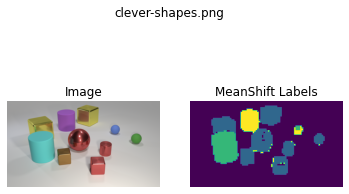

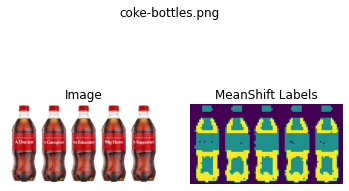

In [8]:
# read two images in list
two_images = ["clever-shapes.png", "coke-bottles.png"]

# Loop over the images
for img_path in two_images:
    
    # Read image
    img = Image.open(img_path)
    #Scale down
    img.thumbnail(size)

    # apply meanshift algorithm on the image
    ms_labels = apply_meanshift(img)
    
    # Read and plot the original image
    img =  Image.open(img_path)

    plot_two_images(img_path, img, "Image", ms_labels, "MeanShift Labels")

### Q2. Use Watershed transformation to segment images. Images to be used for this task: `clever-shapes.png` and `coke-bottles.png`

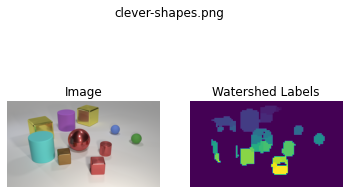

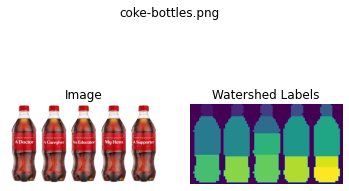

In [9]:
# Loop over the images
for img_path in two_images:
    
    # Read image
    img = Image.open(img_path)
    img.thumbnail(size)
     
    # Apply Watershed algorithm
    ws_labels, distance = apply_watershed(img)

    # Read the original image
    img = Image.open(img_path)

    plot_two_images(img_path, img, "Image", ws_labels, "Watershed Labels")

### Q3. Compare MeanShift and Watershed segmentation results. Image to be used for this task: `blueberries.png`

Change the way of threshold to cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU

In [10]:
def apply_watershed_1(img, threshold=None):
    
    # TODO: Apply Watershed on image
    # Follow the following hints as per the lab specification.

    # Step 1 - Convert the image to gray scale
    # and convert the image to a numpy matrix
    img1 = img.convert("L")
    img_array = np.array(img1)
    
    # Step 2 - Calculate the distance transform
    # Hint: use ndi.distance_transform_edt(img_array)
    ret,thresh = cv2.threshold(img_array,125,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    distance = ndi.distance_transform_edt(thresh)
    
    # Step 3 - Generate the watershed markers
    # Hint: use the peak_local_max() function from the skimage.feature library
    # to get the local maximum values and then convert them to markers
    # using ndi.label() -- note the markers are the 0th output to this function
    markers = ndi.label(peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=thresh))[0]
    
    # Step 4 - Perform watershed and store the labels
    # Hint: use the watershed() function from the skimage.morphology library
    # with three inputs: -distance, markers and your image array as a mask
    ws_labels = watershed(-distance, markers, mask=thresh)
    
    return ws_labels, distance

Step 1: Apply the MeanShift and Watershed algorithms on the image as in the previous tasks


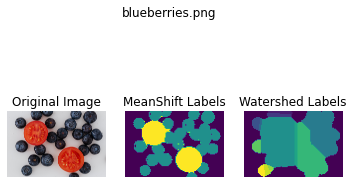

In [11]:
# Read image
img_path = "blueberries.png"
img = Image.open(img_path)
img.thumbnail(size)

img_mat = np.array(img)

ms_labels = apply_meanshift(img)
    
# Apply watershed with global thresholding
ws_labels, distance = apply_watershed(img)

# Read the original image
img = Image.open(img_path)

print('Step 1: Apply the MeanShift and Watershed algorithms on the image as in the previous tasks')
plot_three_images(img_path, img, "Original Image",
                      ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")

Step 2: Have done some image manipulation to improve the Watershed segmentation.


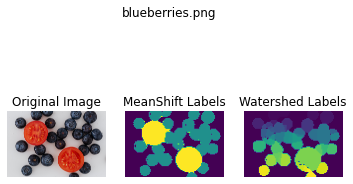

In [12]:
# Read image
img_path = "blueberries.png"
img = Image.open(img_path)
img.thumbnail(size)

img_mat = np.array(img)

ms_labels = apply_meanshift(img)
    
# Apply watershed with global thresholding
ws_labels, distance = apply_watershed_1(img)

# Read the original image
img = Image.open(img_path)

print('Step 2: Have done some image manipulation to improve the Watershed segmentation.')
plot_three_images(img_path, img, "Original Image",
                      ms_labels, "MeanShift Labels",
                      ws_labels, "Watershed Labels")